## Score Prediction Model
### - Problem Statement:
What will be predicted score if a student study for 9.25 hrs in a day?

### - Approach:
In this task we will predict the percentage of marks using linear regression that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.


In [27]:
# Loading neccesary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [28]:
#Reading the data from link:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

#Print that data imported successfully
print("Data imported successfully")
data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [29]:
# Describing the data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## - Data Cleaning:
**Checking for null values**

In [5]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In this dataset, there are **no null values**. So, data cleaning is not required for the dataset.

## - Data Visualization:
Let's plot this data that we have on 2-D graph to eyeball our dataset and see if we can manually find any kind of relationship between the two parameters- **Hours** and **Scores**.

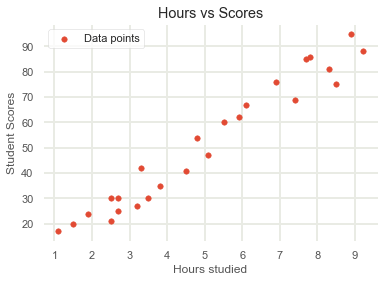

In [25]:
# Plotting the graph
# x-axis values 
x = data['Hours']
# y-axis values 
y = data['Scores']

# plotting points as a scatter plot 
plt.scatter(x, y, label= "Data points", marker= "o", s=30) 

# x-axis label 
plt.xlabel('Hours studied') 
# frequency label 
plt.ylabel('Student Scores') 
# plot title 
plt.title('Hours vs Scores') 
# showing grid
plt.grid(color='#e9ebe4', linestyle='-', linewidth=2)
plt.rcParams['axes.facecolor'] = '#ffffff'
plt.legend()
# function to show the plot 
plt.show()

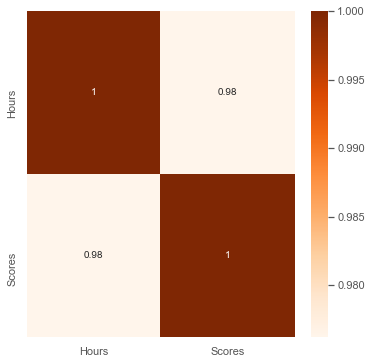

In [35]:
#To find the corelation between the number of hours studied and scores obtained
relation = data.corr()
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(relation, annot=True, cmap='Oranges',ax=ax) 
plt.show() 

From the graph we can refer that there is **98%** corelation between **Hours** & **Scores**

## - Preparing the data:

**Segregation of the data for training and testing**

In [36]:
# Classification of the data:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

In [43]:
# Spliting the data for training and testing
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    test_size=0.2, random_state=0)

**Training the data using Linear Regression Algorithm**

In [87]:
# Fitting the data in the model
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

In [88]:
print ("Coefficient -", model.coef_)
print ("Intercept - ", model.intercept_)

Coefficient - [9.91065648]
Intercept -  2.0181600414346974


Training complete!

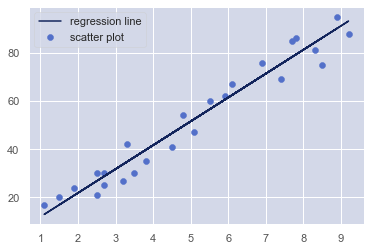

(array([9.91065648]), 2.0181600414346974)

In [80]:
# Plotting the Linear regression line
line = model.coef_ * x + model.intercept_

# Plotting for the test data
plt.rcParams['axes.facecolor'] = '#d3d8e8'
plt.scatter(x, y, color='#5370c9',label='scatter plot')
plt.plot(x, line, color='#13255c', label='regression line')
plt.legend()
plt.show()
model.coef_,model.intercept_

## Making Predictions:
Now, we have trained our algorithm, it's time to make some predictions.

In [81]:
# Predicting the scores
y_pred = model.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [82]:
# Comparing Actual vs Predicted
compare_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
compare_df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


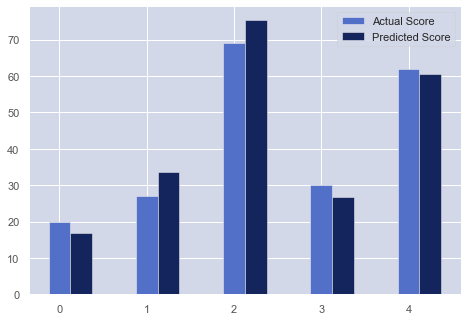

In [83]:
# Comparing Actual vs Predicted score through bar plot
l = []
for i in y_test:
  l.append(i)
for i in y_pred:
  l.append(i)
l = np.array(l)
l = l.reshape(2,5)
data = l
X = np.arange(5)
fig = plt.figure()
plt.rcParams['axes.facecolor'] = '#d3d8e8'
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = '#5370c9', width = 0.25, label='Actual Score')
ax.bar(X + 0.25, data[1], color = '#13255c', width = 0.25, label='Predicted Score')
plt.legend()

In [84]:
#Accuracy of training and testing data
print(f'The train score:  {model.score(X_train,y_train)}')
print(f'The test score:   {model.score(X_test,y_test)}')

The train score:  0.9515510725211552
The test score:   0.9454906892105355


In [90]:
# Testing with some new data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = model.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737535


### - Evaluating the Model:
The final step is to evaluate the performance of algorithm.This step is particularly important to compare how well different<br>
algorithms perform on a particular dataset.

In [94]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367
R-2: 0.9454906892105355


R-squared gives the goodness of the fit and as can be seen it is 94.5% which is really good. This means that the algorithm has proven to be good for the given data.

It can also be said that the model's accuracy is 94.5%

### - Conclusion:

In [95]:
print('Linear Regression')
print('Test accuracy: ',model.score(X_test, y_test))
print('Predicted score for 9.25 hours: ',own_pred,'\n')

Linear Regression
Test accuracy:  0.9454906892105355
Predicted score for 9.25 hours:  [93.69173249] 

